# 기본 import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 23

# 표들을 불러오기

In [3]:
sample_submission_V2 = pd.read_csv('./pubg-finish-placement-prediction/sample_submission_V2.csv')
test_V2 = pd.read_csv('./pubg-finish-placement-prediction/test_V2.csv')
train_V2 = pd.read_csv('./pubg-finish-placement-prediction/train_V2.csv')

In [4]:
sample_submission_V2

,Id,winPlacePerc
0,9329eb41e215eb,1
1,639bd0dcd7bda8,1
2,63d5c8ef8dfe91,1
3,cf5b81422591d1,1
4,ee6a295187ba21,1
...,...,...
1934169,a316c3a13887d5,1
1934170,5312146b27d875,1
1934171,fc8818b5b32ad3,1
1934172,a0f91e35f8458f,1


In [5]:
test_V2

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,0,...,28,1500,0,0.0,0,0.000,0,0,588.00,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,0,...,47,1503,2,4669.0,0,0.000,0,0,2017.00,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,0,...,27,1565,0,0.0,0,0.000,0,0,787.80,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,0,...,44,1465,0,0.0,0,0.000,0,0,1812.00,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,0,...,27,1480,1,0.0,0,0.000,0,0,2963.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,a316c3a13887d5,80e82180c90951,f276da5fd73536,1,2,381.00,3,0,7,4,1294,...,20,-1,1,0.0,0,0.000,0,0,1799.00,5,1526
1934170,5312146b27d875,147264a127c56e,fb77cbfe094a6b,0,0,0.00,0,0,0,64,1449,...,26,-1,0,0.0,0,0.000,0,0,1195.00,3,1496
1934171,fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,0,91.96,0,0,3,24,0,...,29,1482,0,0.0,0,7.798,1,0,3327.00,3,0
1934172,a0f91e35f8458f,149a506a64c2b1,3a2cf335bc302f,1,2,138.60,0,0,12,25,0,...,48,1456,1,0.0,0,0.000,0,0,1893.00,4,0


# 전처리

In [6]:
#유일한 NaN이 있는 row를 제거하고 쓸데없는 column 제거
Dwait = train_V2[train_V2['winPlacePerc'].notnull()]
Dtrain = Dwait.drop(['Id', 'groupId', 'matchId', 'killPoints', 'rankPoints', 'winPoints'], axis=1)
Dtrain

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,0,0,0.00,0,0,0,60,0,0,0.00,1306,squad-fpp,28,26,0,0.0000,0,0.000,0,0,244.80,1,0.4444
1,0,0,91.47,0,0,0,57,0,0,0.00,1777,squad-fpp,26,25,0,0.0045,0,11.040,0,0,1434.00,5,0.6400
2,1,0,68.00,0,0,0,47,0,0,0.00,1318,duo,50,47,0,0.0000,0,0.000,0,0,161.80,2,0.7755
3,0,0,32.90,0,0,0,75,0,0,0.00,1436,squad-fpp,31,30,0,0.0000,0,0.000,0,0,202.70,3,0.1667
4,0,0,100.00,0,0,0,45,1,1,58.53,1424,solo-fpp,97,95,0,0.0000,0,0.000,0,0,49.75,2,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,0,0,0.00,1873,squad-fpp,29,28,0,1292.0000,0,0.000,0,0,1019.00,3,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0.00,1435,solo,93,93,0,0.0000,0,0.000,0,0,81.70,6,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0.00,1321,squad-fpp,28,28,0,0.0000,0,2.184,0,0,788.70,4,0.4815
4446964,0,4,180.40,1,1,2,11,2,1,98.50,1373,squad-fpp,26,25,2,0.0000,0,0.000,0,0,2748.00,8,0.8000


In [7]:
#도보 이동 없이 무기 획득 3개 이상이라면 불법으로 판단
((Dtrain['walkDistance'] == 0) & (Dtrain['weaponsAcquired'] > 2)).sum()

5768

In [8]:
#rideDistance가 0인데 roadKills가 1 이상이라면?
((Dtrain['rideDistance'] == 0) & (Dtrain['roadKills'] > 0)).sum()

186

In [9]:
#다행이다
((Dtrain['matchType'].str.contains('solo')) & (Dtrain['revives'] > 0)).sum()

0

In [10]:
# boosts랑 heals가 item 기반이므로 도보 이동 없이 무기 획득 3개 이상이랑 같음
print(((Dtrain['walkDistance'] == 0) & (Dtrain['boosts'] > 2)).sum())
print(((Dtrain['walkDistance'] == 0) & (Dtrain['heals'] > 2)).sum())

118
492


In [11]:
pencil_a = (Dtrain[(Dtrain['walkDistance'] == 0) & ((Dtrain['weaponsAcquired'] > 2) | (Dtrain['boosts'] > 2) | (Dtrain['heals'] > 2))].index)
Dtrain_a = Dtrain.drop(pencil_a)

In [12]:
#matchType 각각의 개수
Dtrain_a['matchType'].value_counts()

squad-fpp           1756185
duo-fpp              996688
squad                626525
solo-fpp             536753
duo                  313591
solo                 177753
normal-squad-fpp      15996
crashfpp               6287
normal-duo-fpp         5406
flaretpp               2505
normal-solo-fpp        1490
flarefpp                718
normal-squad            439
crashtpp                371
normal-solo             277
normal-duo              191
Name: matchType, dtype: int64

### 다음과 같이 분류
- train_V2, test_V2, sample_submission_V2 : 날 것
- Dtrain : train_V2에서 유일한 NaN을 가진 row 제거한 뒤 Id 3총사, Points 3총사 column을 제거
- Dtrain_a : Dtrain에서 (walkDistance == 0) & ((weaponsAcquired > 2) | (boosts > 2) | (heals > 2))인 모든 row를 제거
- Dsquadfpp : Dtrain_a에서 matchType이 squad-fpp인 것
- Dduofpp : Dtrain_a에서 matchType이 duo-fpp인 것
- Dsolofpp : Dtrain_a에서 matchType이 solo-fpp인 것
- Dsquad : Dtrain_a에서 matchType이 squad인 것
- Dduo : Dtrain_a에서 matchType이 duo인 것
- Dsolo : Dtrain_a에서 matchType이 solo인 것
- Dothers : Dtrain_a에서 matchType이 그 외

In [13]:
Dsquadfpp = Dtrain_a[Dtrain_a['matchType'] == 'squad-fpp']
Dduofpp = Dtrain_a[Dtrain_a['matchType'] == 'duo-fpp']
Dsolofpp = Dtrain_a[Dtrain_a['matchType'] == 'solo-fpp']
Dsquad = Dtrain_a[Dtrain_a['matchType'] == 'squad']
Dduo = Dtrain_a[Dtrain_a['matchType'] == 'duo']
Dsolo = Dtrain_a[Dtrain_a['matchType'] == 'solo']
Dothers = Dtrain_a[(Dtrain_a['matchType'].str.contains('normal')) | 
                   (Dtrain_a['matchType'].str.contains('crash')) | 
                   Dtrain_a['matchType'].str.contains('flare')]
print(len(Dsquadfpp),len(Dduofpp),len(Dsolofpp),len(Dsquad),len(Dduo),len(Dsolo),len(Dothers))

1756185 996688 536753 626525 313591 177753 33680


## 평균과 개수 of weaponsAcquired

<Figure size 1440x2880 with 0 Axes>

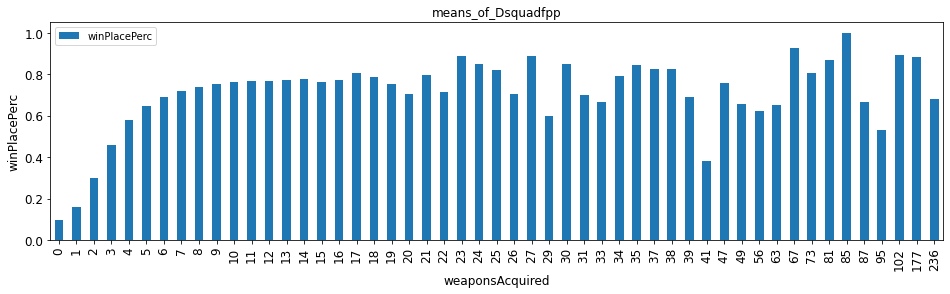

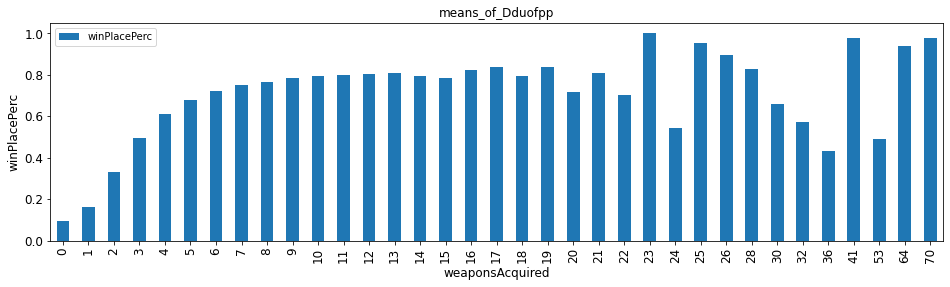

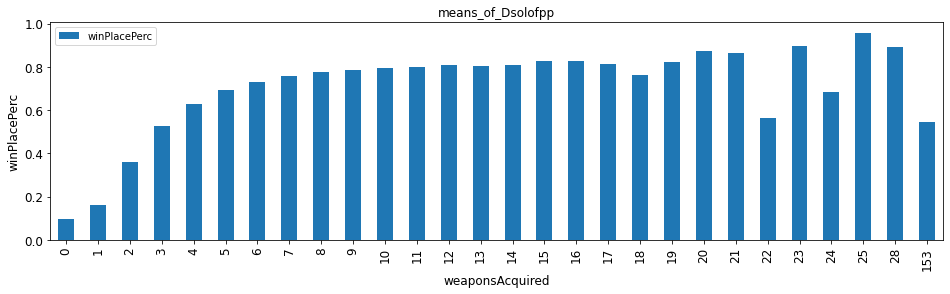

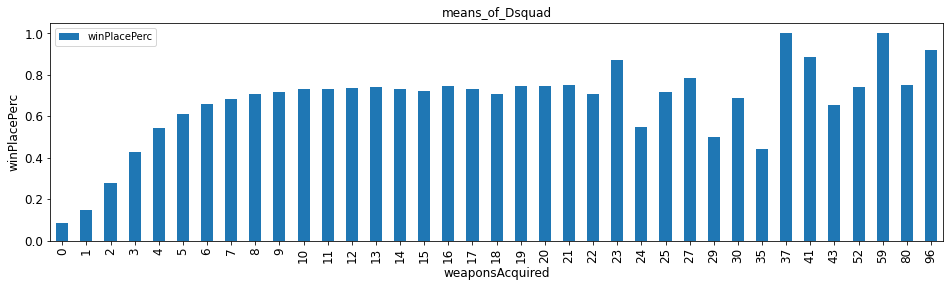

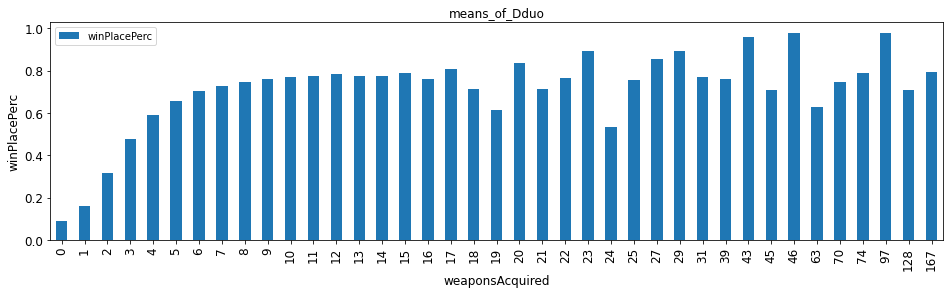

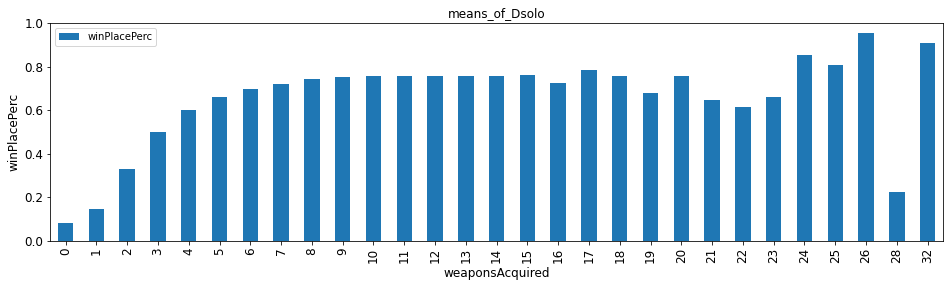

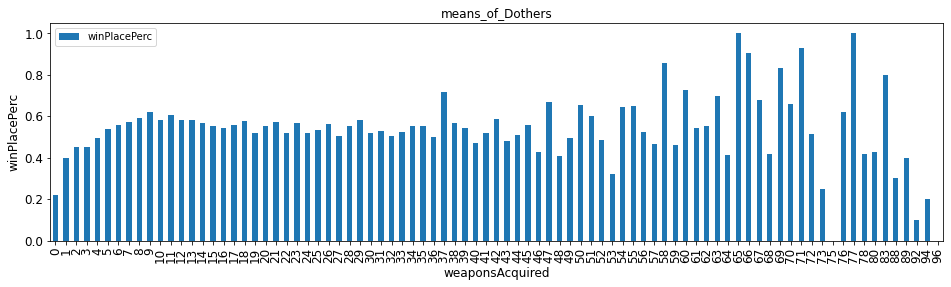

In [18]:
fig = plt.figure(figsize=(20,40))

squadfppweapons = Dsquadfpp.groupby('weaponsAcquired').mean()[['winPlacePerc']]
ax1 = squadfppweapons.plot(kind='bar', title='means_of_Dsquadfpp', figsize=(16, 4), legend=True, fontsize=12)
ax1.set_xlabel('weaponsAcquired', fontsize=12)
ax1.set_ylabel('winPlacePerc', fontsize=12)

duofppweapons = Dduofpp.groupby('weaponsAcquired').mean()[['winPlacePerc']]
ax2 = duofppweapons.plot(kind='bar', title='means_of_Dduofpp', figsize=(16, 4), legend=True, fontsize=12)
ax2.set_xlabel('weaponsAcquired', fontsize=12)
ax2.set_ylabel('winPlacePerc', fontsize=12)

solofppweapons = Dsolofpp.groupby('weaponsAcquired').mean()[['winPlacePerc']]
ax3 = solofppweapons.plot(kind='bar', title='means_of_Dsolofpp', figsize=(16, 4), legend=True, fontsize=12)
ax3.set_xlabel('weaponsAcquired', fontsize=12)
ax3.set_ylabel('winPlacePerc', fontsize=12)

squadweapons = Dsquad.groupby('weaponsAcquired').mean()[['winPlacePerc']]
ax4 = squadweapons.plot(kind='bar', title='means_of_Dsquad', figsize=(16, 4), legend=True, fontsize=12)
ax4.set_xlabel('weaponsAcquired', fontsize=12)
ax4.set_ylabel('winPlacePerc', fontsize=12)

duoweapons = Dduo.groupby('weaponsAcquired').mean()[['winPlacePerc']]
ax5 = duoweapons.plot(kind='bar', title='means_of_Dduo', figsize=(16, 4), legend=True, fontsize=12)
ax5.set_xlabel('weaponsAcquired', fontsize=12)
ax5.set_ylabel('winPlacePerc', fontsize=12)

soloweapons = Dsolo.groupby('weaponsAcquired').mean()[['winPlacePerc']]
ax6 = soloweapons.plot(kind='bar', title='means_of_Dsolo', figsize=(16, 4), legend=True, fontsize=12)
ax6.set_xlabel('weaponsAcquired', fontsize=12)
ax6.set_ylabel('winPlacePerc', fontsize=12)

othersweapons = Dothers.groupby('weaponsAcquired').mean()[['winPlacePerc']]
ax7 = othersweapons.plot(kind='bar', title='means_of_Dothers', figsize=(16, 4), legend=True, fontsize=12)
ax7.set_xlabel('weaponsAcquired', fontsize=12)
ax7.set_ylabel('winPlacePerc', fontsize=12)

plt.show()

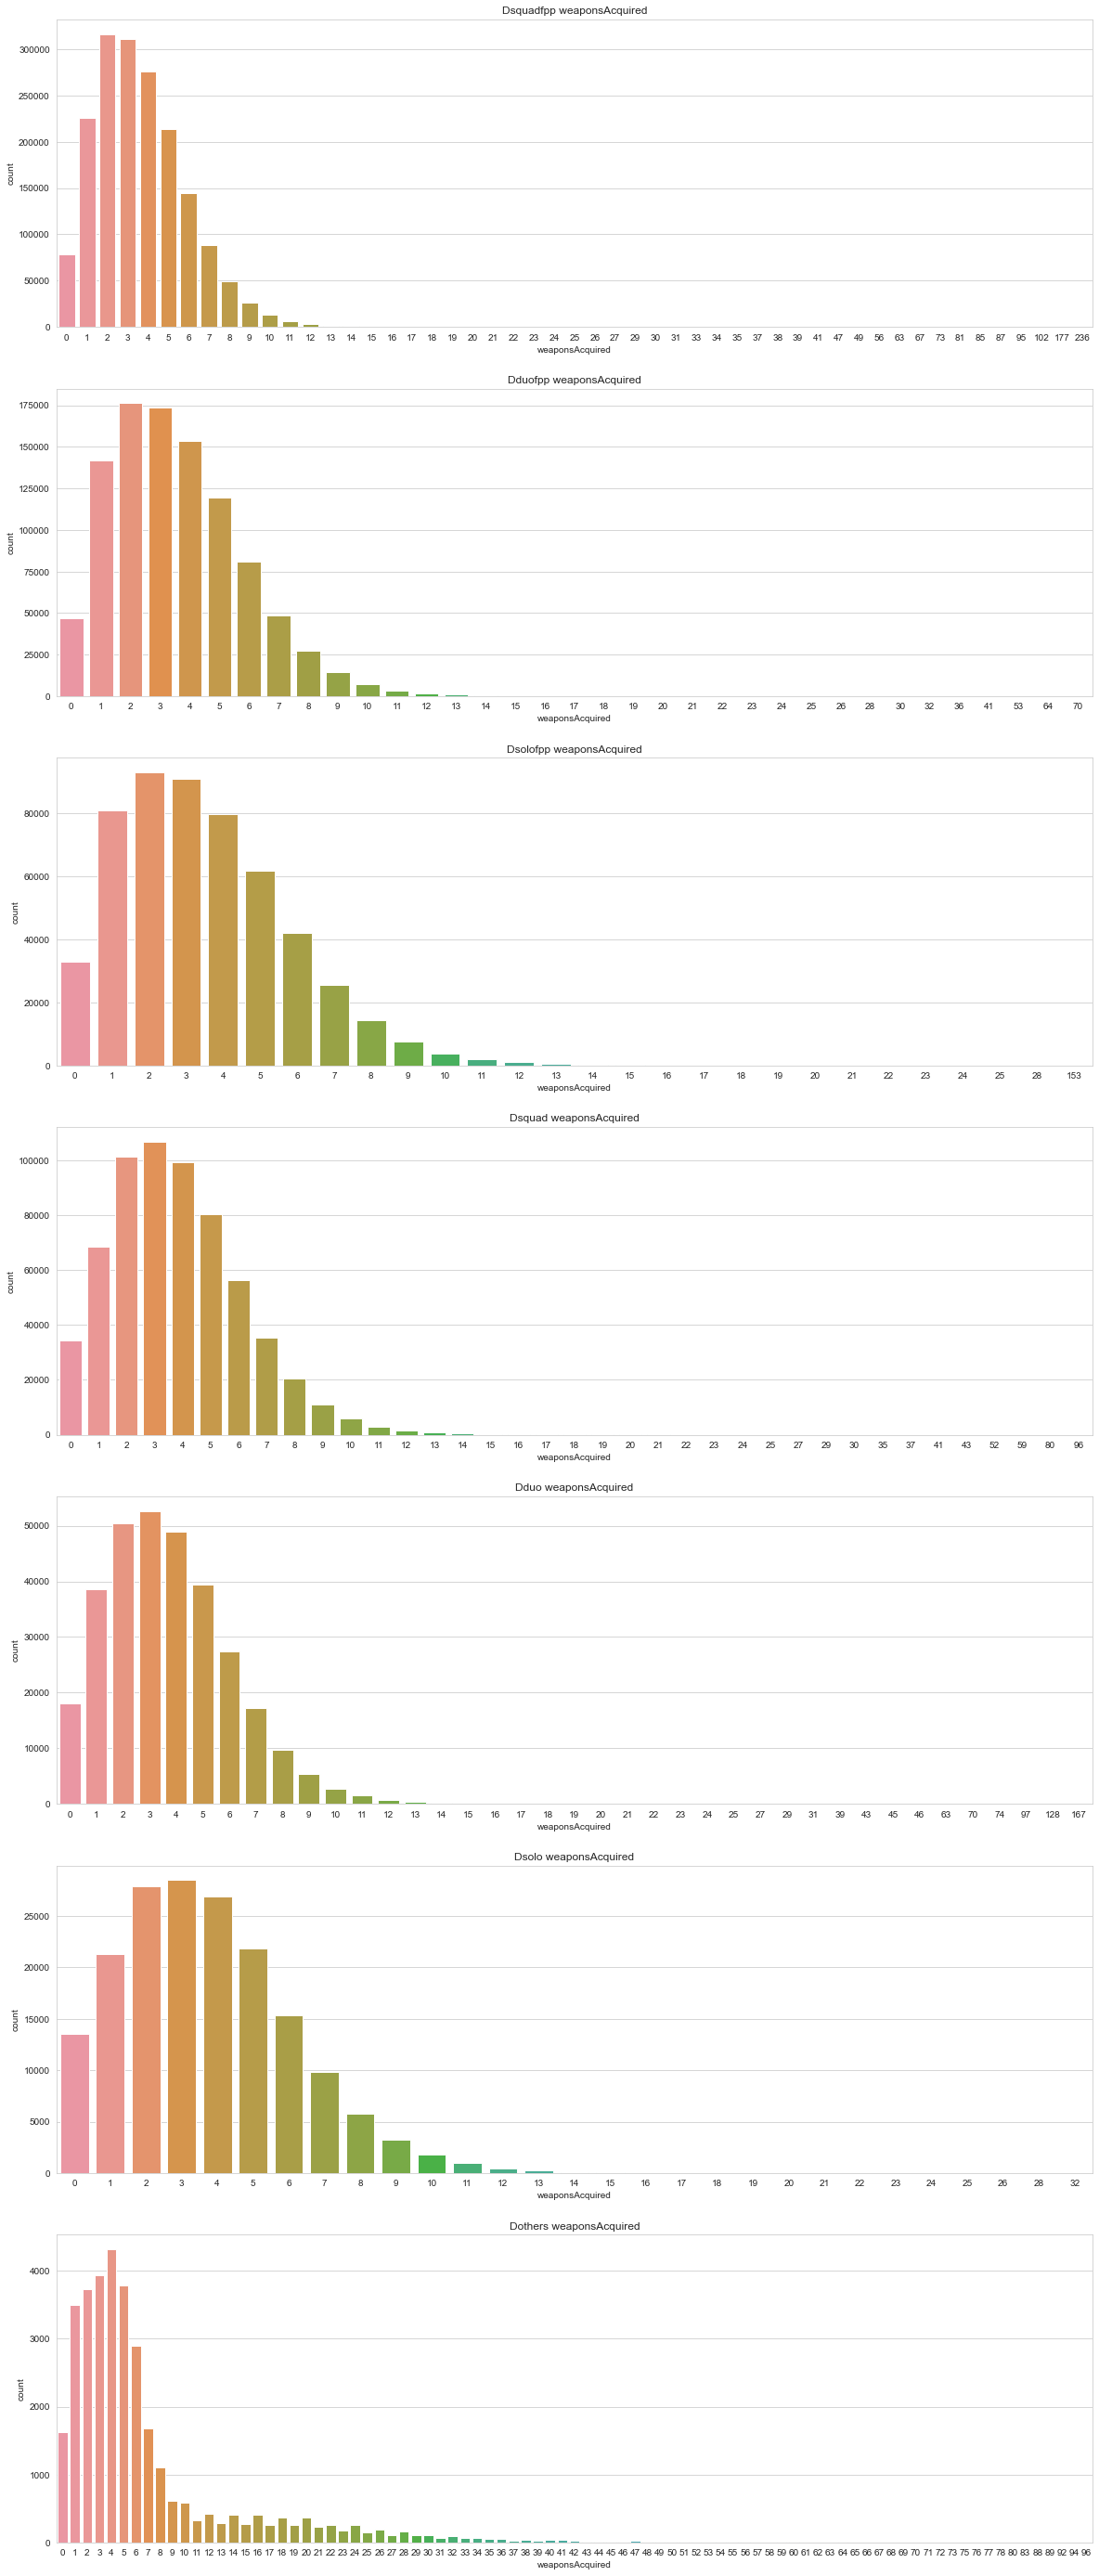

In [33]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(20,50))

ax01 = fig.add_subplot(7,1,1)
ax01.set_title('Dsquadfpp weaponsAcquired')
sns.countplot(x='weaponsAcquired', data=Dsquadfpp, ax=ax01)
ax02 = fig.add_subplot(7,1,2)
ax02.set_title('Dduofpp weaponsAcquired')
sns.countplot(x='weaponsAcquired', data=Dduofpp, ax=ax02)
ax03 = fig.add_subplot(7,1,3)
ax03.set_title('Dsolofpp weaponsAcquired')
sns.countplot(x='weaponsAcquired', data=Dsolofpp, ax=ax03)
ax04 = fig.add_subplot(7,1,4)
ax04.set_title('Dsquad weaponsAcquired')
sns.countplot(x='weaponsAcquired', data=Dsquad, ax=ax04)
ax05 = fig.add_subplot(7,1,5)
ax05.set_title('Dduo weaponsAcquired')
sns.countplot(x='weaponsAcquired', data=Dduo, ax=ax05)
ax06 = fig.add_subplot(7,1,6)
ax06.set_title('Dsolo weaponsAcquired')
sns.countplot(x='weaponsAcquired', data=Dsolo, ax=ax06)
ax07 = fig.add_subplot(7,1,7)
ax07.set_title('Dothers weaponsAcquired')
sns.countplot(x='weaponsAcquired', data=Dothers, ax=ax07)

plt.show()

## 평균과 개수 of boosts

<Figure size 1440x2880 with 0 Axes>

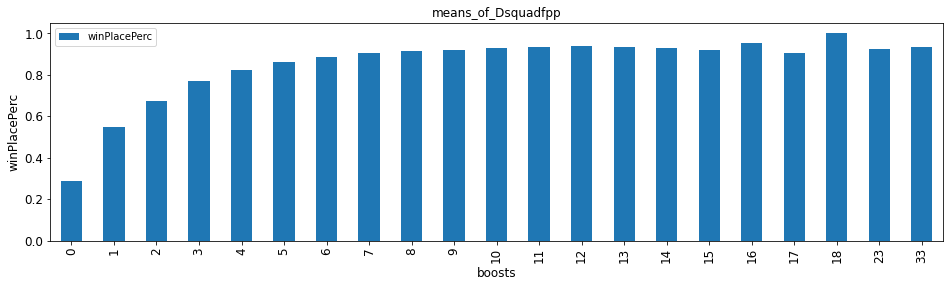

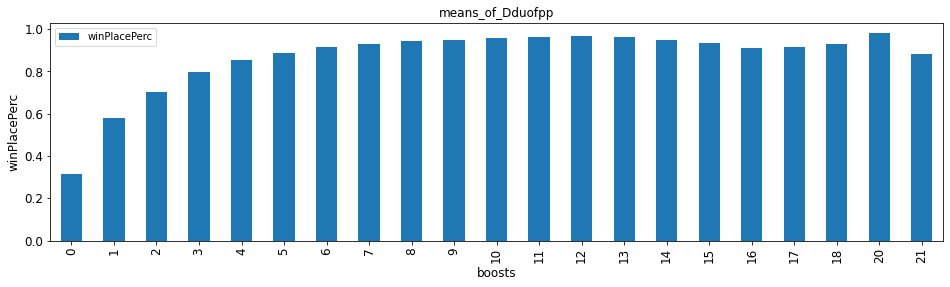

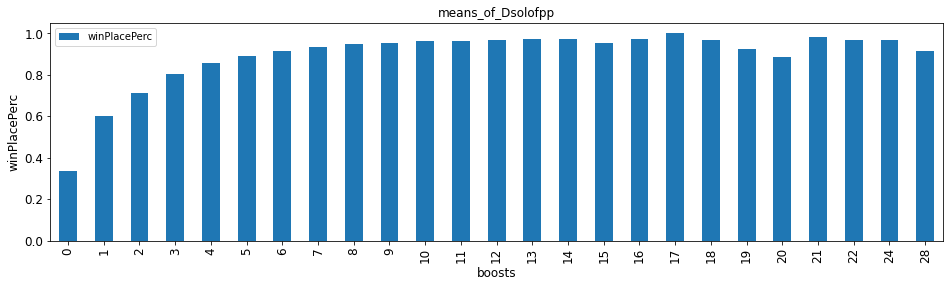

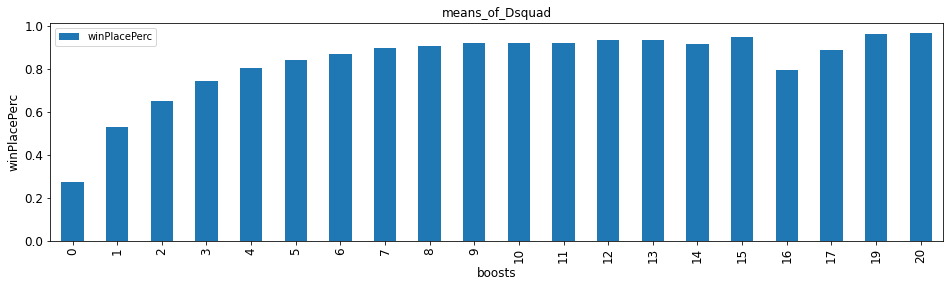

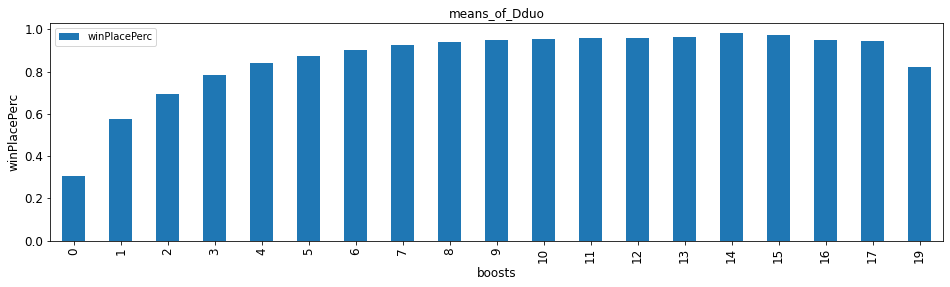

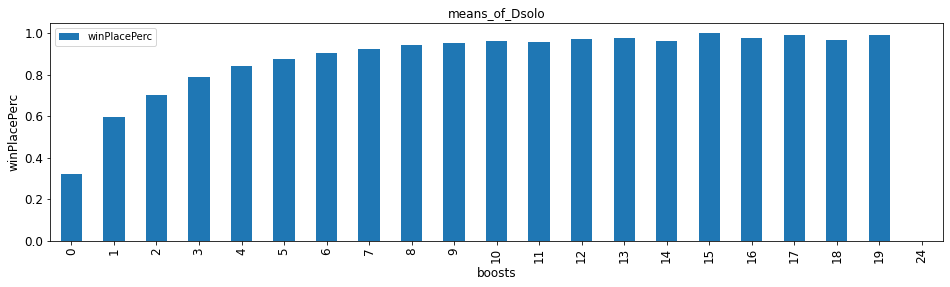

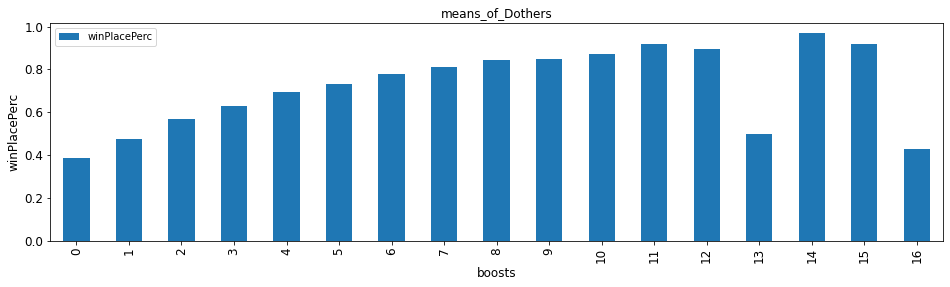

In [19]:
fig = plt.figure(figsize=(20,40))

squadfppboosts = Dsquadfpp.groupby('boosts').mean()[['winPlacePerc']]
ax1 = squadfppboosts.plot(kind='bar', title='means_of_Dsquadfpp', figsize=(16, 4), legend=True, fontsize=12)
ax1.set_xlabel('boosts', fontsize=12)
ax1.set_ylabel('winPlacePerc', fontsize=12)

duofppboosts = Dduofpp.groupby('boosts').mean()[['winPlacePerc']]
ax2 = duofppboosts.plot(kind='bar', title='means_of_Dduofpp', figsize=(16, 4), legend=True, fontsize=12)
ax2.set_xlabel('boosts', fontsize=12)
ax2.set_ylabel('winPlacePerc', fontsize=12)

solofppboosts = Dsolofpp.groupby('boosts').mean()[['winPlacePerc']]
ax3 = solofppboosts.plot(kind='bar', title='means_of_Dsolofpp', figsize=(16, 4), legend=True, fontsize=12)
ax3.set_xlabel('boosts', fontsize=12)
ax3.set_ylabel('winPlacePerc', fontsize=12)

squadboosts = Dsquad.groupby('boosts').mean()[['winPlacePerc']]
ax4 = squadboosts.plot(kind='bar', title='means_of_Dsquad', figsize=(16, 4), legend=True, fontsize=12)
ax4.set_xlabel('boosts', fontsize=12)
ax4.set_ylabel('winPlacePerc', fontsize=12)

duoboosts = Dduo.groupby('boosts').mean()[['winPlacePerc']]
ax5 = duoboosts.plot(kind='bar', title='means_of_Dduo', figsize=(16, 4), legend=True, fontsize=12)
ax5.set_xlabel('boosts', fontsize=12)
ax5.set_ylabel('winPlacePerc', fontsize=12)

soloboosts = Dsolo.groupby('boosts').mean()[['winPlacePerc']]
ax6 = soloboosts.plot(kind='bar', title='means_of_Dsolo', figsize=(16, 4), legend=True, fontsize=12)
ax6.set_xlabel('boosts', fontsize=12)
ax6.set_ylabel('winPlacePerc', fontsize=12)

othersboosts = Dothers.groupby('boosts').mean()[['winPlacePerc']]
ax7 = othersboosts.plot(kind='bar', title='means_of_Dothers', figsize=(16, 4), legend=True, fontsize=12)
ax7.set_xlabel('boosts', fontsize=12)
ax7.set_ylabel('winPlacePerc', fontsize=12)

plt.show()

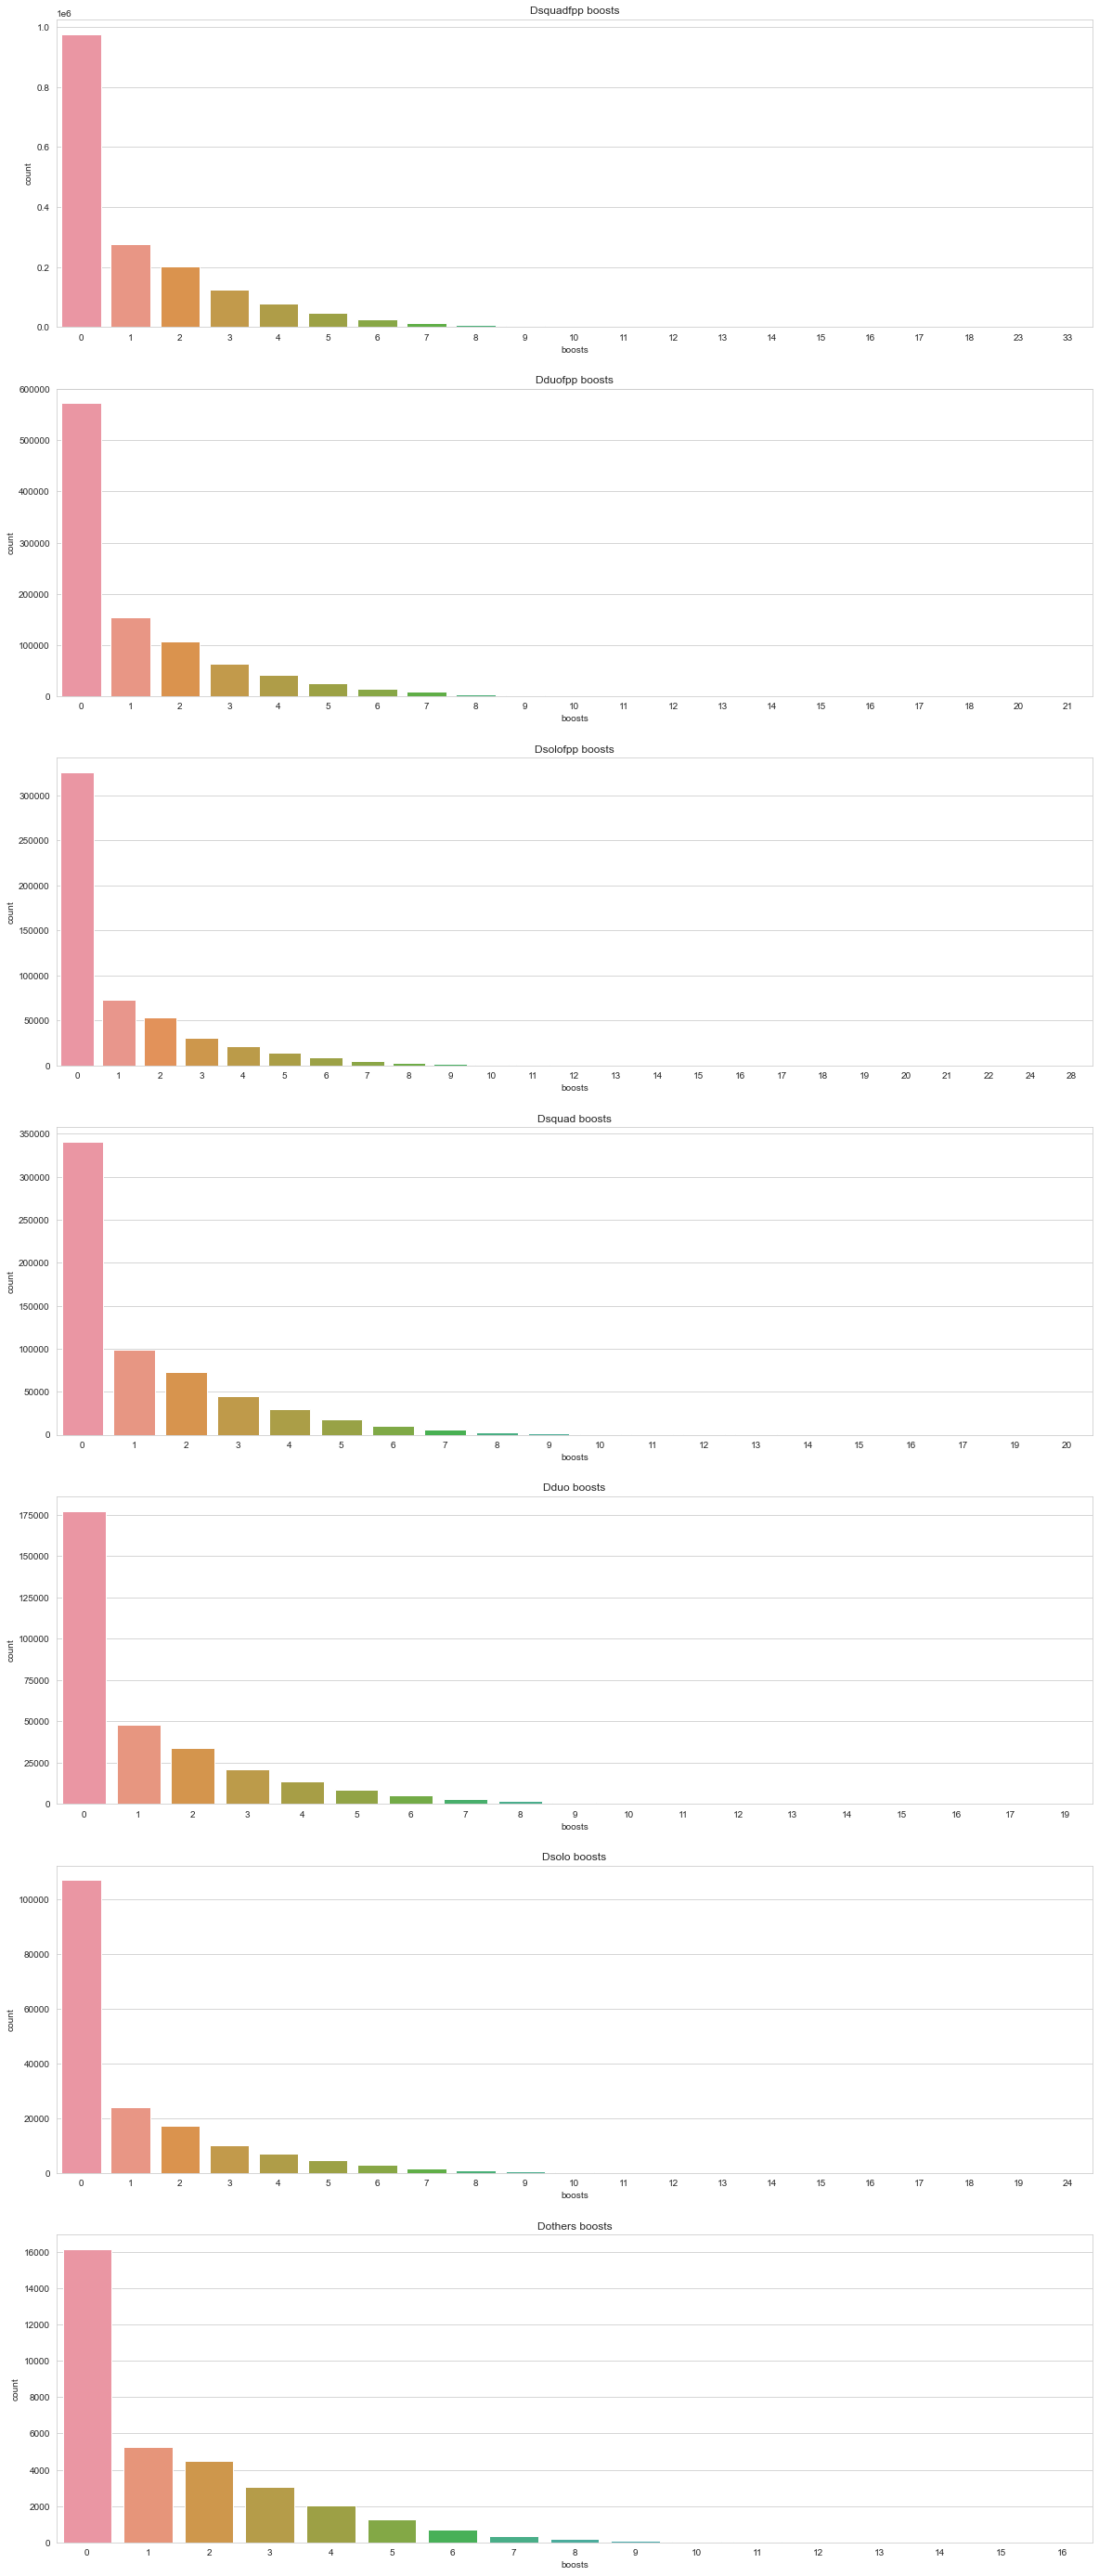

In [34]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(20,50))

ax01 = fig.add_subplot(7,1,1)
ax01.set_title('Dsquadfpp boosts')
sns.countplot(x='boosts', data=Dsquadfpp, ax=ax01)
ax02 = fig.add_subplot(7,1,2)
ax02.set_title('Dduofpp boosts')
sns.countplot(x='boosts', data=Dduofpp, ax=ax02)
ax03 = fig.add_subplot(7,1,3)
ax03.set_title('Dsolofpp boosts')
sns.countplot(x='boosts', data=Dsolofpp, ax=ax03)
ax04 = fig.add_subplot(7,1,4)
ax04.set_title('Dsquad boosts')
sns.countplot(x='boosts', data=Dsquad, ax=ax04)
ax05 = fig.add_subplot(7,1,5)
ax05.set_title('Dduo boosts')
sns.countplot(x='boosts', data=Dduo, ax=ax05)
ax06 = fig.add_subplot(7,1,6)
ax06.set_title('Dsolo boosts')
sns.countplot(x='boosts', data=Dsolo, ax=ax06)
ax07 = fig.add_subplot(7,1,7)
ax07.set_title('Dothers boosts')
sns.countplot(x='boosts', data=Dothers, ax=ax07)

plt.show()

## 평균과 개수 of heals

<Figure size 1440x2880 with 0 Axes>

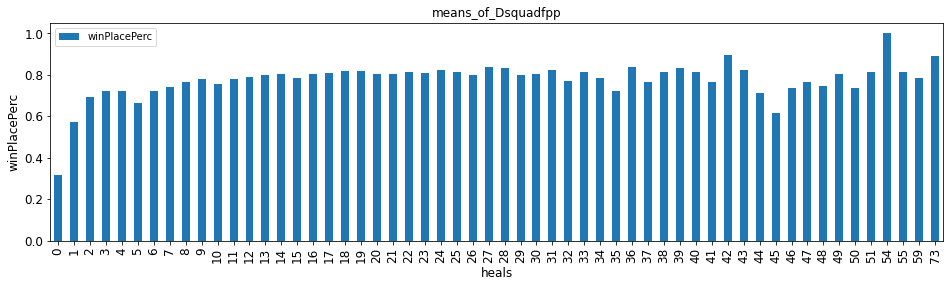

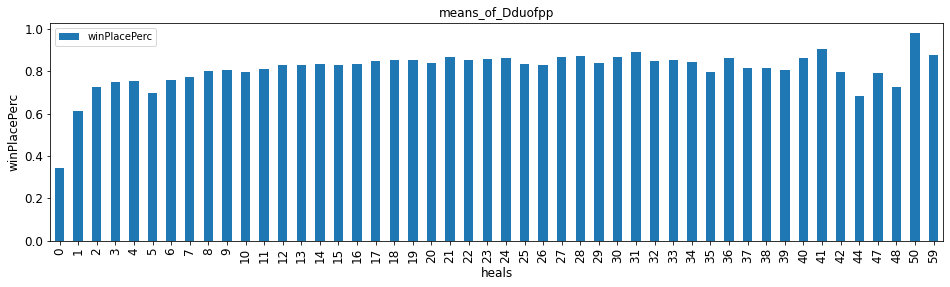

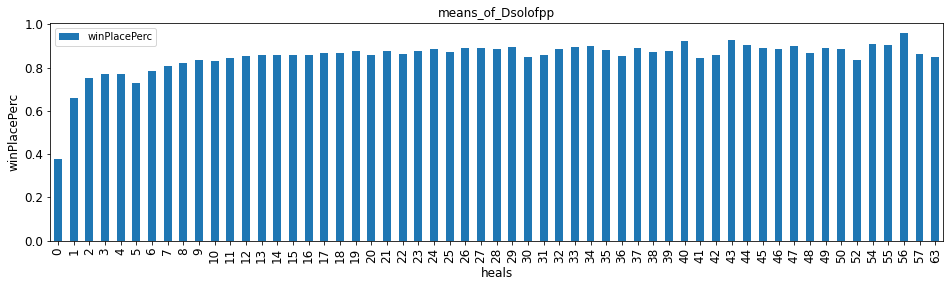

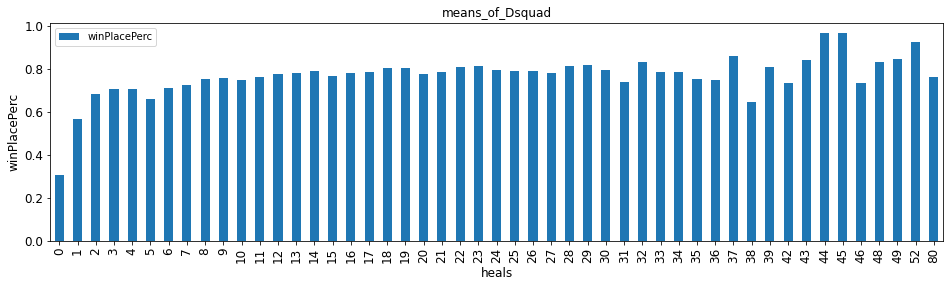

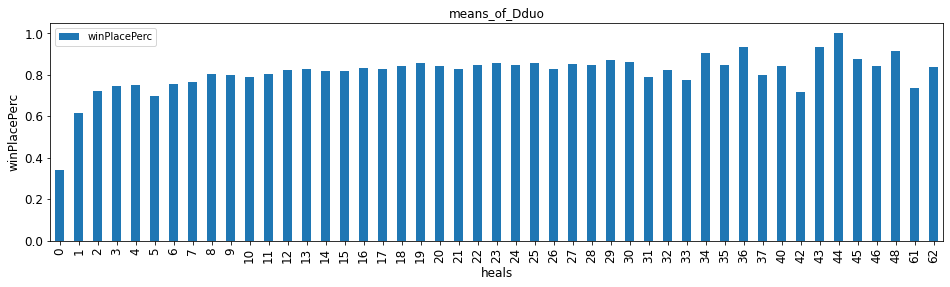

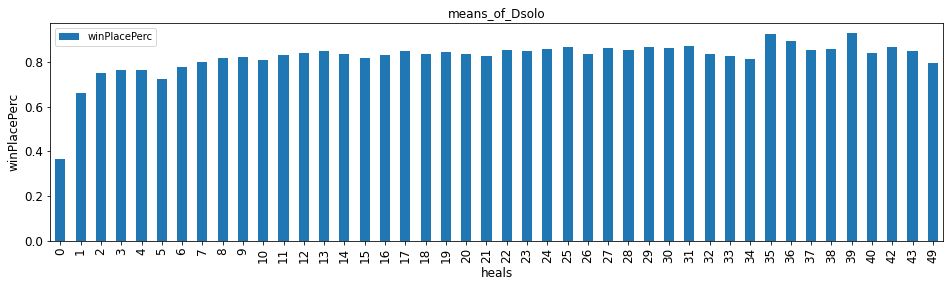

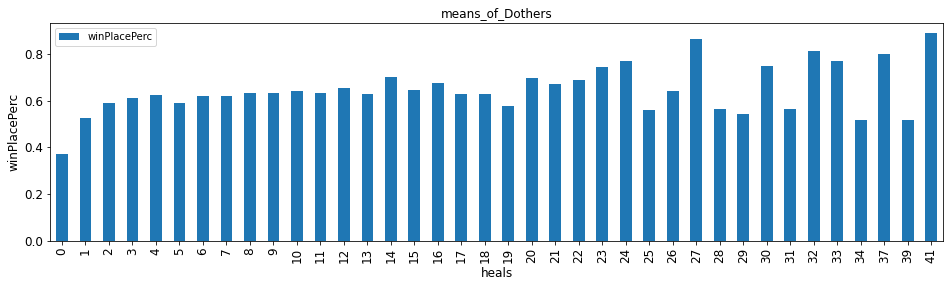

In [25]:
fig = plt.figure(figsize=(20,40))

squadfppheals = Dsquadfpp.groupby('heals').mean()[['winPlacePerc']]
ax1 = squadfppheals.plot(kind='bar', title='means_of_Dsquadfpp', figsize=(16, 4), legend=True, fontsize=12)
ax1.set_xlabel('heals', fontsize=12)
ax1.set_ylabel('winPlacePerc', fontsize=12)

duofppheals = Dduofpp.groupby('heals').mean()[['winPlacePerc']]
ax2 = duofppheals.plot(kind='bar', title='means_of_Dduofpp', figsize=(16, 4), legend=True, fontsize=12)
ax2.set_xlabel('heals', fontsize=12)
ax2.set_ylabel('winPlacePerc', fontsize=12)

solofppheals = Dsolofpp.groupby('heals').mean()[['winPlacePerc']]
ax3 = solofppheals.plot(kind='bar', title='means_of_Dsolofpp', figsize=(16, 4), legend=True, fontsize=12)
ax3.set_xlabel('heals', fontsize=12)
ax3.set_ylabel('winPlacePerc', fontsize=12)

squadheals = Dsquad.groupby('heals').mean()[['winPlacePerc']]
ax4 = squadheals.plot(kind='bar', title='means_of_Dsquad', figsize=(16, 4), legend=True, fontsize=12)
ax4.set_xlabel('heals', fontsize=12)
ax4.set_ylabel('winPlacePerc', fontsize=12)

duoheals = Dduo.groupby('heals').mean()[['winPlacePerc']]
ax5 = duoheals.plot(kind='bar', title='means_of_Dduo', figsize=(16, 4), legend=True, fontsize=12)
ax5.set_xlabel('heals', fontsize=12)
ax5.set_ylabel('winPlacePerc', fontsize=12)

soloheals = Dsolo.groupby('heals').mean()[['winPlacePerc']]
ax6 = soloheals.plot(kind='bar', title='means_of_Dsolo', figsize=(16, 4), legend=True, fontsize=12)
ax6.set_xlabel('heals', fontsize=12)
ax6.set_ylabel('winPlacePerc', fontsize=12)

othersheals = Dothers.groupby('heals').mean()[['winPlacePerc']]
ax7 = othersheals.plot(kind='bar', title='means_of_Dothers', figsize=(16, 4), legend=True, fontsize=12)
ax7.set_xlabel('heals', fontsize=12)
ax7.set_ylabel('winPlacePerc', fontsize=12)

plt.show()

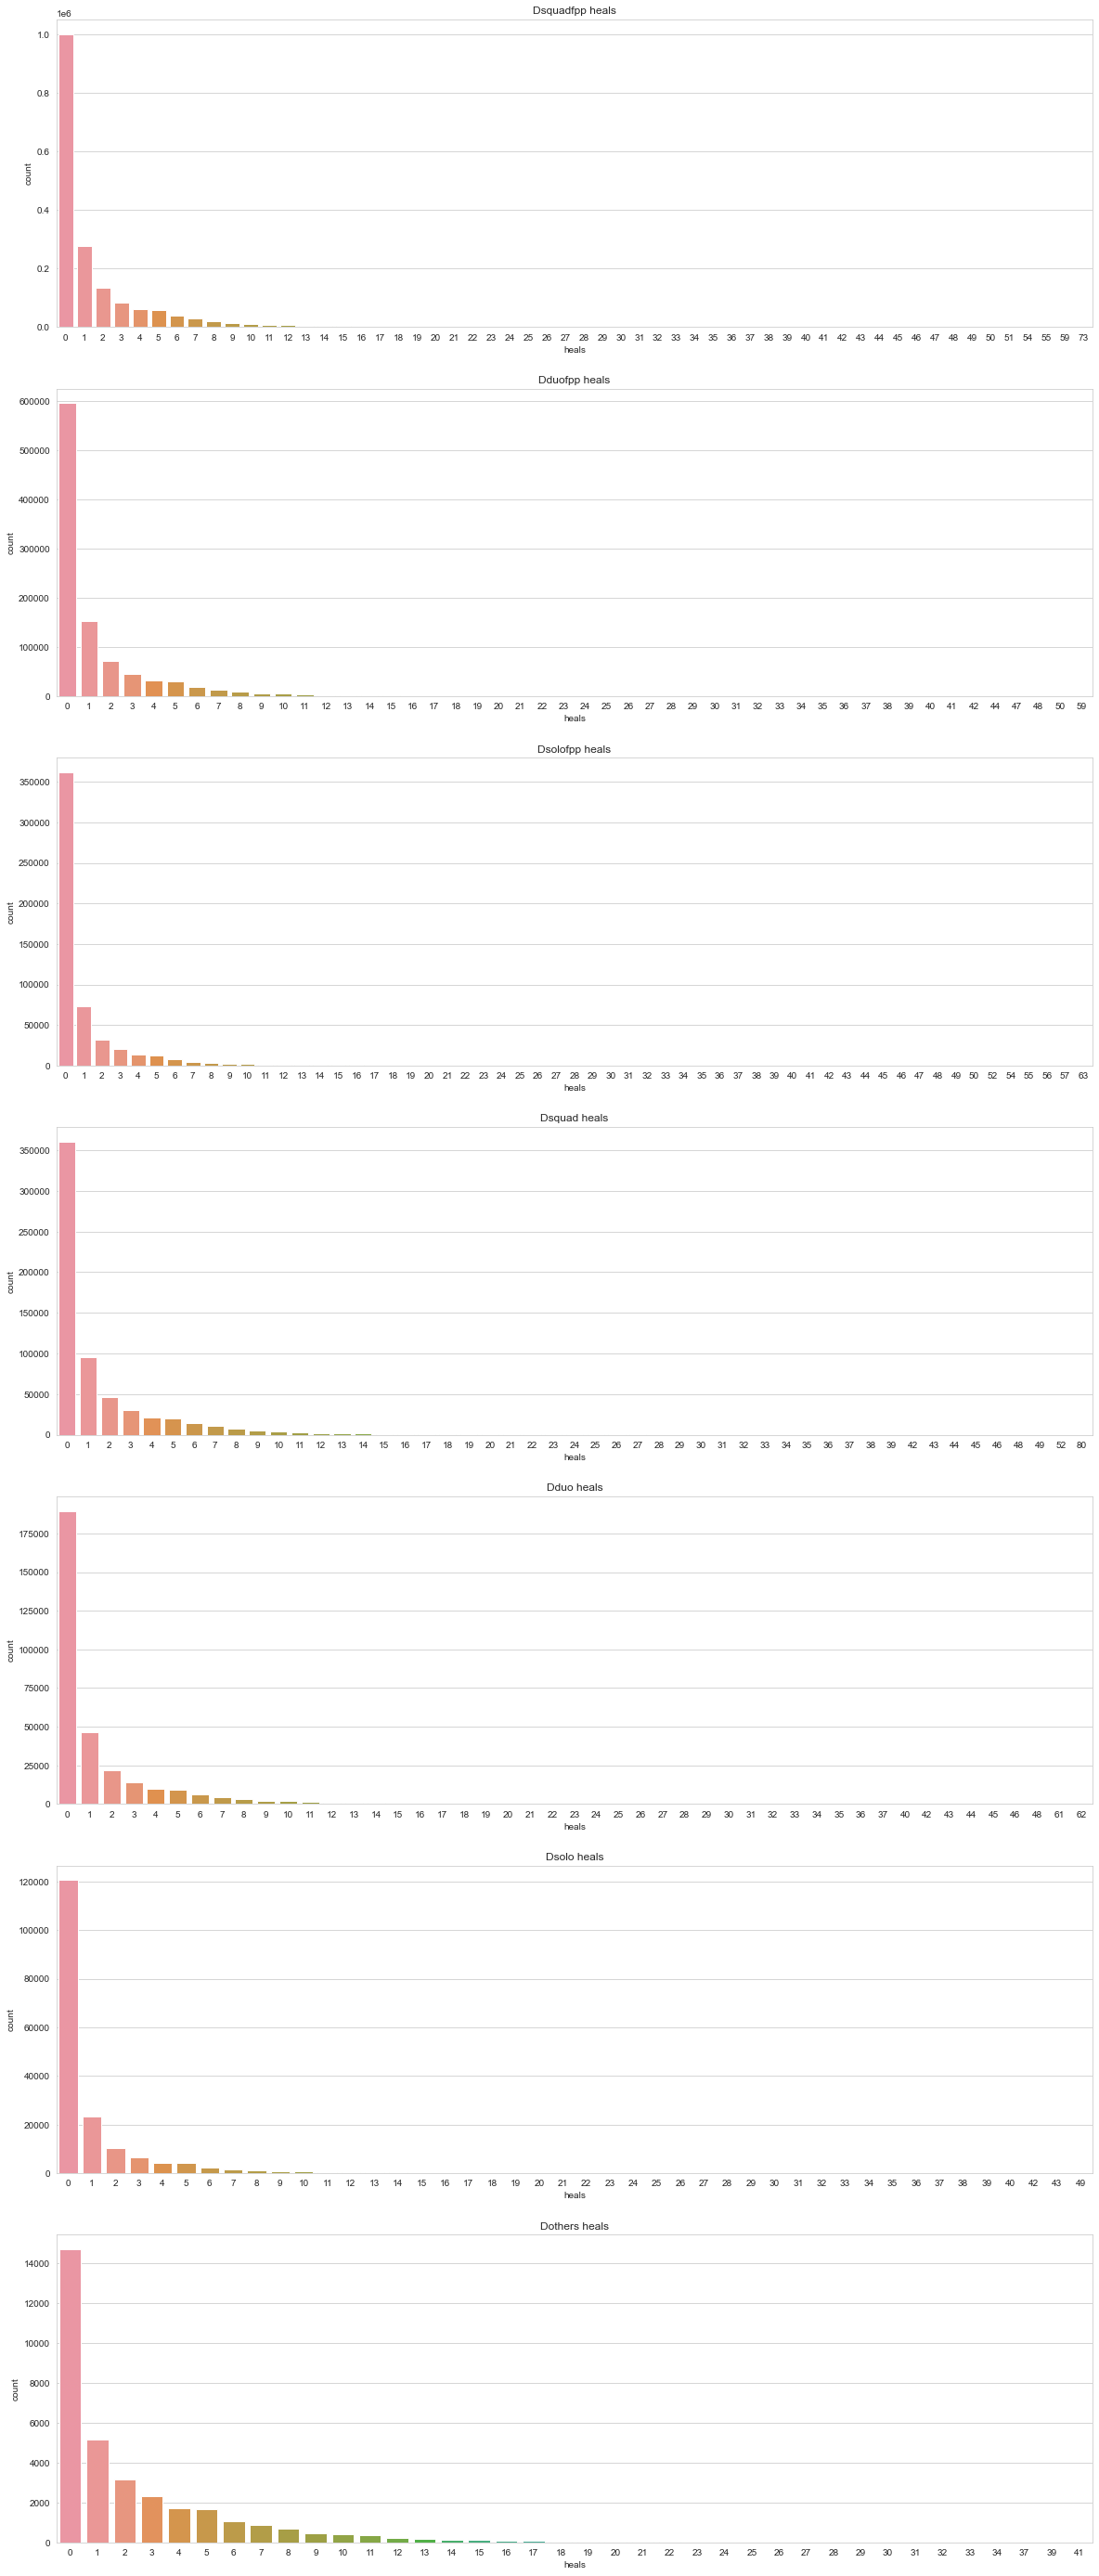

In [35]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(20,50))

ax01 = fig.add_subplot(7,1,1)
ax01.set_title('Dsquadfpp heals')
sns.countplot(x='heals', data=Dsquadfpp, ax=ax01)
ax02 = fig.add_subplot(7,1,2)
ax02.set_title('Dduofpp heals')
sns.countplot(x='heals', data=Dduofpp, ax=ax02)
ax03 = fig.add_subplot(7,1,3)
ax03.set_title('Dsolofpp heals')
sns.countplot(x='heals', data=Dsolofpp, ax=ax03)
ax04 = fig.add_subplot(7,1,4)
ax04.set_title('Dsquad heals')
sns.countplot(x='heals', data=Dsquad, ax=ax04)
ax05 = fig.add_subplot(7,1,5)
ax05.set_title('Dduo heals')
sns.countplot(x='heals', data=Dduo, ax=ax05)
ax06 = fig.add_subplot(7,1,6)
ax06.set_title('Dsolo heals')
sns.countplot(x='heals', data=Dsolo, ax=ax06)
ax07 = fig.add_subplot(7,1,7)
ax07.set_title('Dothers heals')
sns.countplot(x='heals', data=Dothers, ax=ax07)

plt.show()

## 평균과 개수 of kills

<Figure size 1440x2880 with 0 Axes>

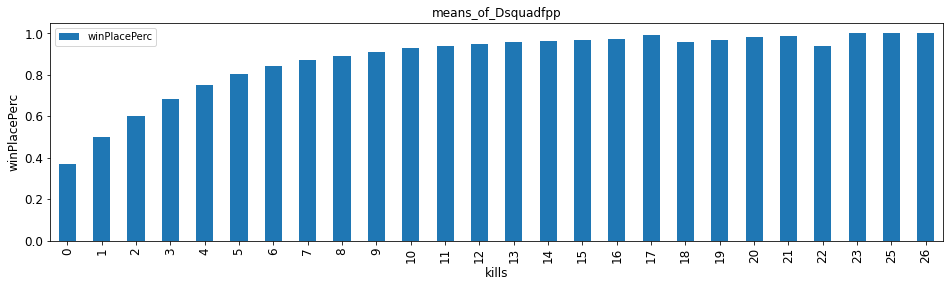

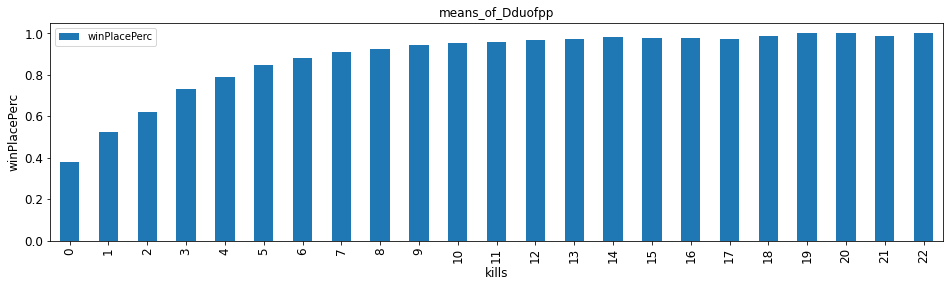

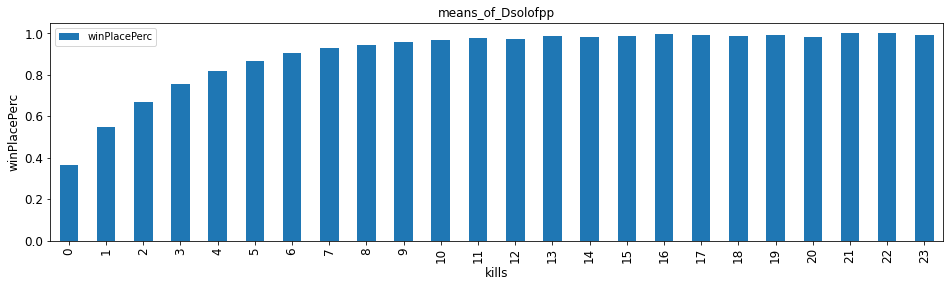

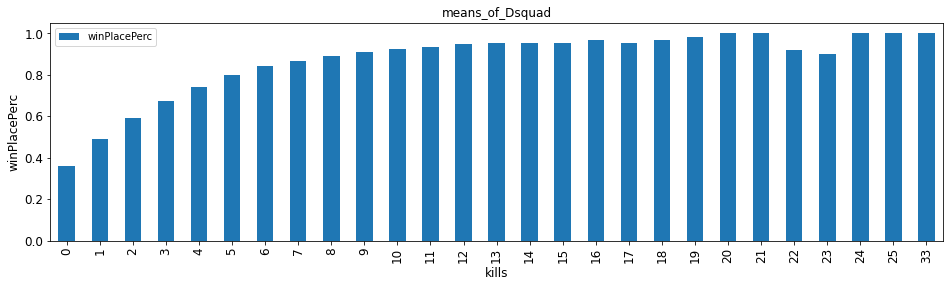

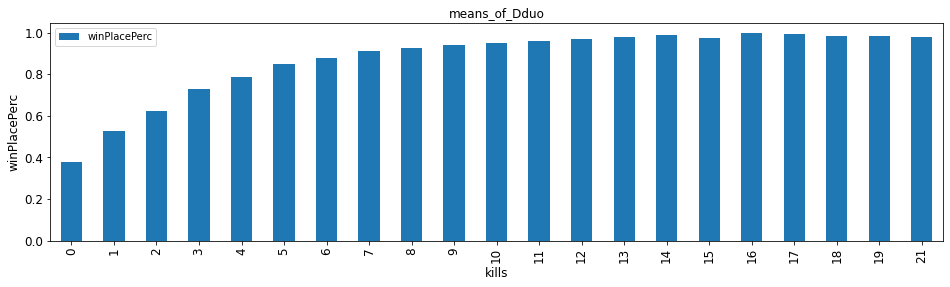

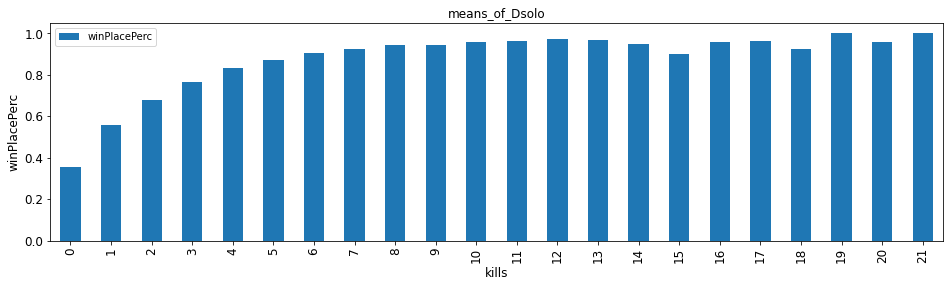

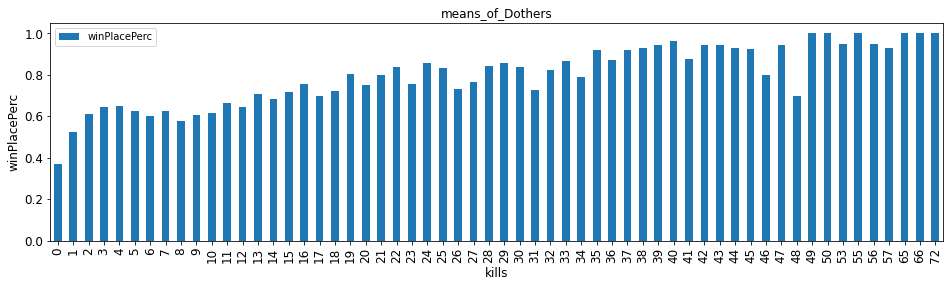

In [24]:
fig = plt.figure(figsize=(20,40))

squadfppkills = Dsquadfpp.groupby('kills').mean()[['winPlacePerc']]
ax1 = squadfppkills.plot(kind='bar', title='means_of_Dsquadfpp', figsize=(16, 4), legend=True, fontsize=12)
ax1.set_xlabel('kills', fontsize=12)
ax1.set_ylabel('winPlacePerc', fontsize=12)

duofppkills = Dduofpp.groupby('kills').mean()[['winPlacePerc']]
ax2 = duofppkills.plot(kind='bar', title='means_of_Dduofpp', figsize=(16, 4), legend=True, fontsize=12)
ax2.set_xlabel('kills', fontsize=12)
ax2.set_ylabel('winPlacePerc', fontsize=12)

solofppkills = Dsolofpp.groupby('kills').mean()[['winPlacePerc']]
ax3 = solofppkills.plot(kind='bar', title='means_of_Dsolofpp', figsize=(16, 4), legend=True, fontsize=12)
ax3.set_xlabel('kills', fontsize=12)
ax3.set_ylabel('winPlacePerc', fontsize=12)

squadkills = Dsquad.groupby('kills').mean()[['winPlacePerc']]
ax4 = squadkills.plot(kind='bar', title='means_of_Dsquad', figsize=(16, 4), legend=True, fontsize=12)
ax4.set_xlabel('kills', fontsize=12)
ax4.set_ylabel('winPlacePerc', fontsize=12)

duokills = Dduo.groupby('kills').mean()[['winPlacePerc']]
ax5 = duokills.plot(kind='bar', title='means_of_Dduo', figsize=(16, 4), legend=True, fontsize=12)
ax5.set_xlabel('kills', fontsize=12)
ax5.set_ylabel('winPlacePerc', fontsize=12)

solokills = Dsolo.groupby('kills').mean()[['winPlacePerc']]
ax6 = solokills.plot(kind='bar', title='means_of_Dsolo', figsize=(16, 4), legend=True, fontsize=12)
ax6.set_xlabel('kills', fontsize=12)
ax6.set_ylabel('winPlacePerc', fontsize=12)

otherskills = Dothers.groupby('kills').mean()[['winPlacePerc']]
ax7 = otherskills.plot(kind='bar', title='means_of_Dothers', figsize=(16, 4), legend=True, fontsize=12)
ax7.set_xlabel('kills', fontsize=12)
ax7.set_ylabel('winPlacePerc', fontsize=12)

plt.show()

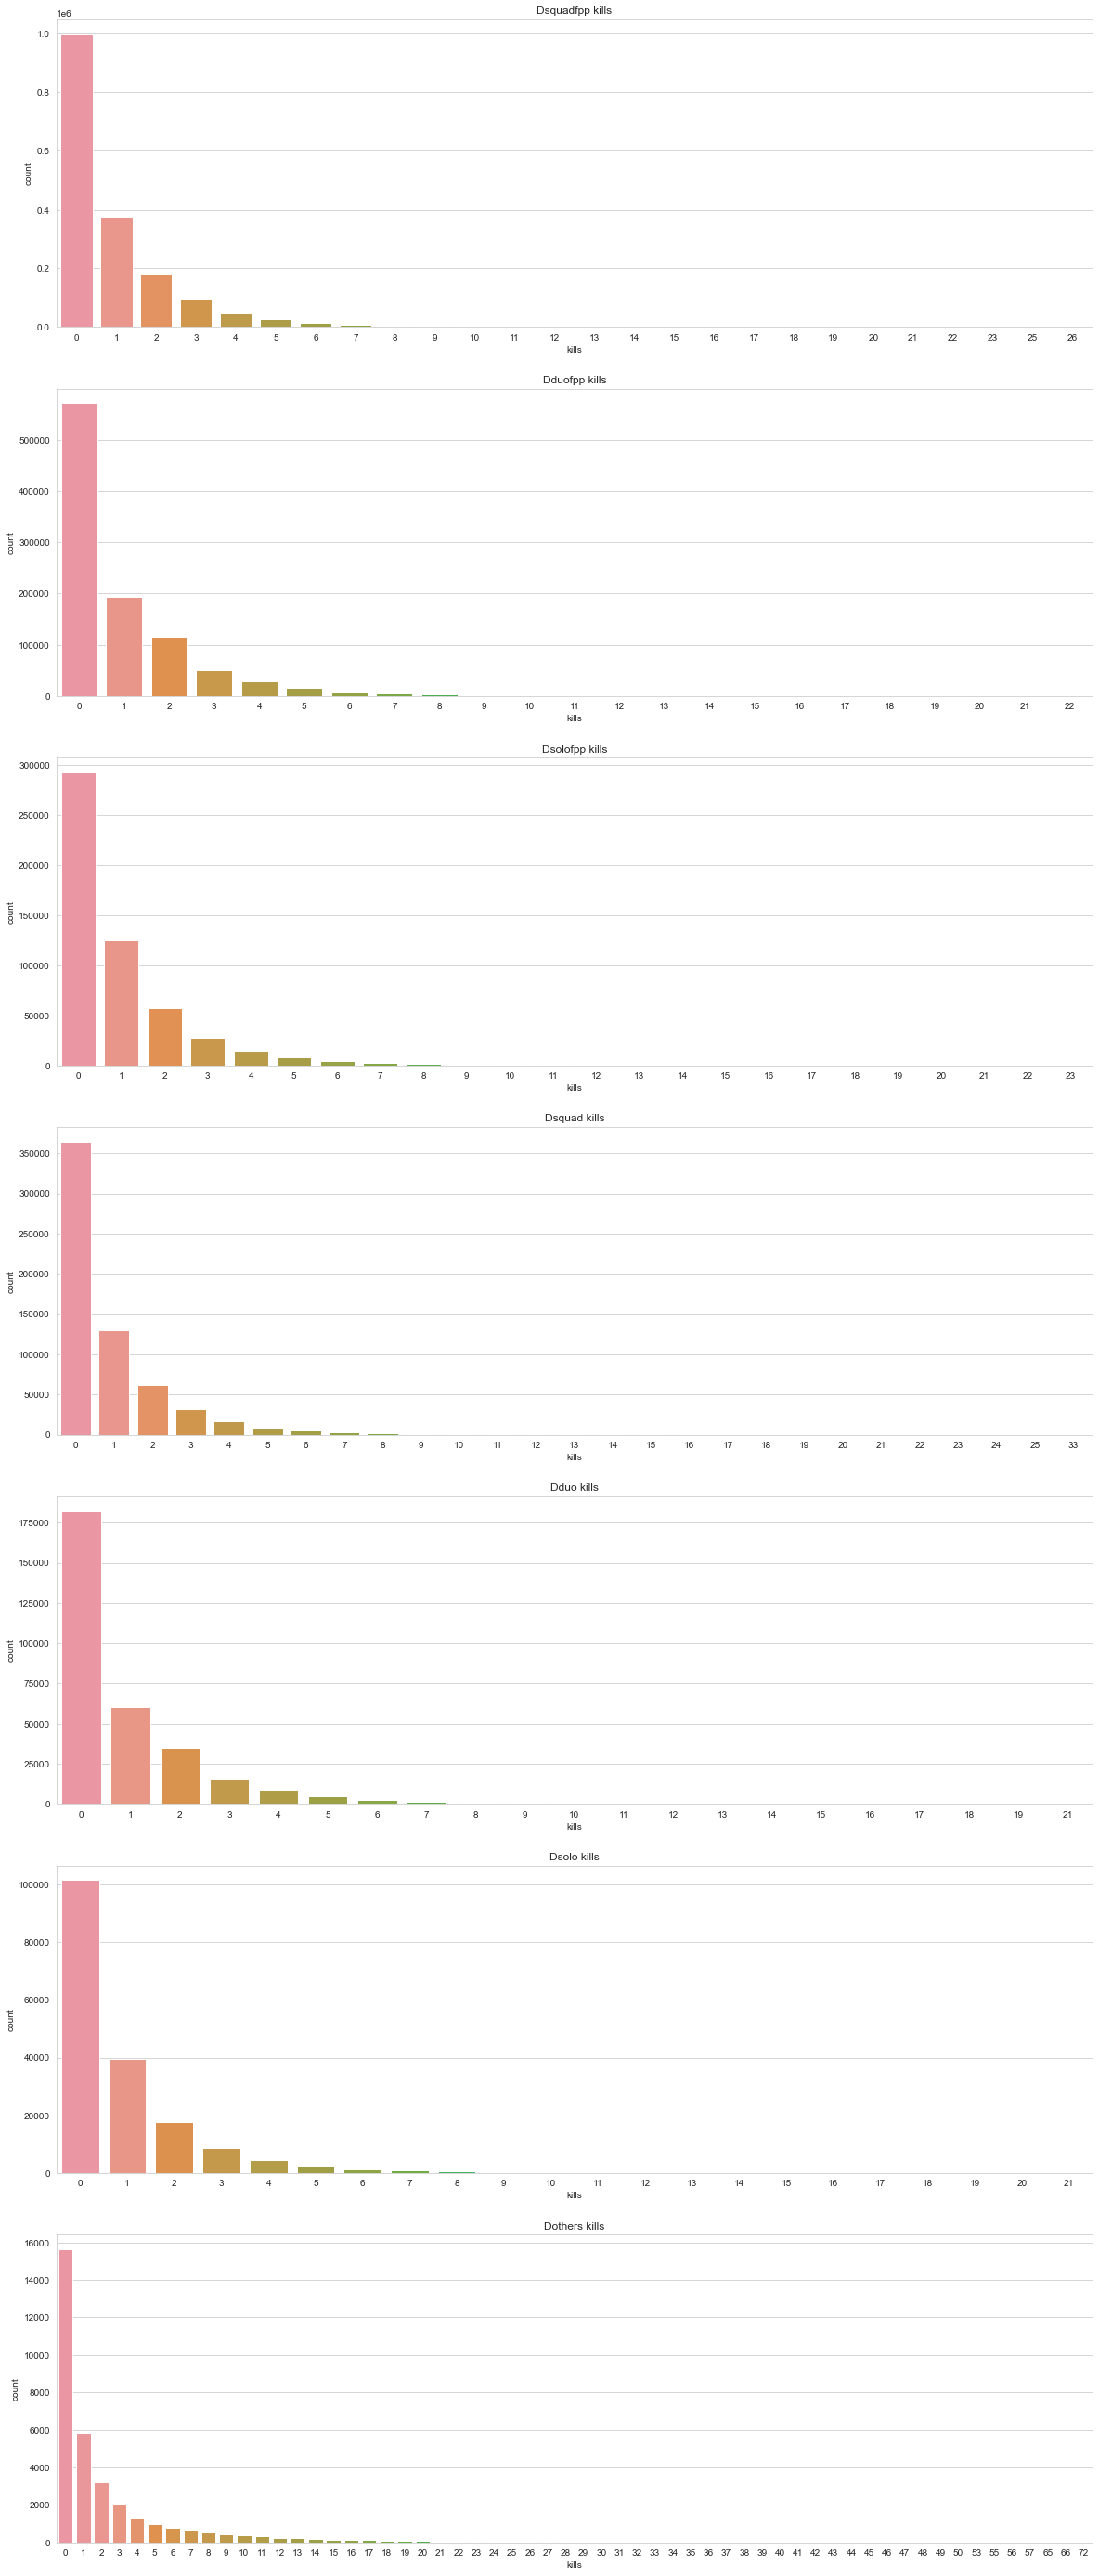

In [36]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(20,50))

ax01 = fig.add_subplot(7,1,1)
ax01.set_title('Dsquadfpp kills')
sns.countplot(x='kills', data=Dsquadfpp, ax=ax01)
ax02 = fig.add_subplot(7,1,2)
ax02.set_title('Dduofpp kills')
sns.countplot(x='kills', data=Dduofpp, ax=ax02)
ax03 = fig.add_subplot(7,1,3)
ax03.set_title('Dsolofpp kills')
sns.countplot(x='kills', data=Dsolofpp, ax=ax03)
ax04 = fig.add_subplot(7,1,4)
ax04.set_title('Dsquad kills')
sns.countplot(x='kills', data=Dsquad, ax=ax04)
ax05 = fig.add_subplot(7,1,5)
ax05.set_title('Dduo kills')
sns.countplot(x='kills', data=Dduo, ax=ax05)
ax06 = fig.add_subplot(7,1,6)
ax06.set_title('Dsolo kills')
sns.countplot(x='kills', data=Dsolo, ax=ax06)
ax07 = fig.add_subplot(7,1,7)
ax07.set_title('Dothers kills')
sns.countplot(x='kills', data=Dothers, ax=ax07)

plt.show()

## 평균과 개수 of headshotKills

<Figure size 1440x2880 with 0 Axes>

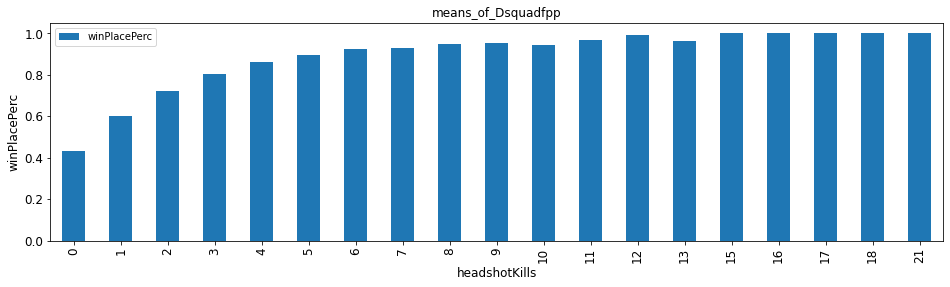

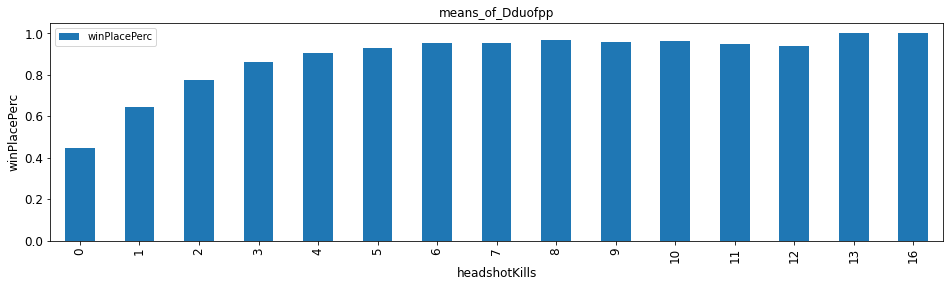

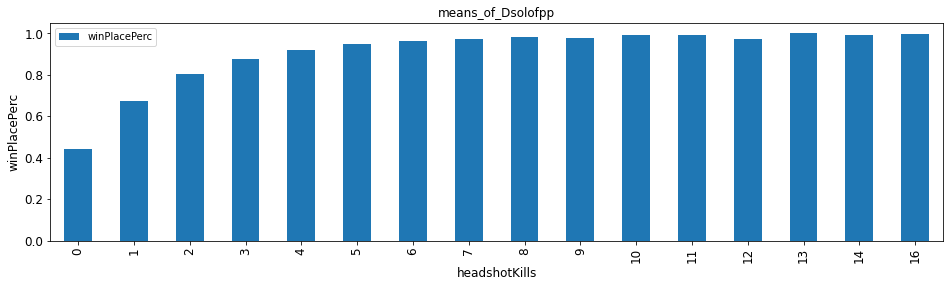

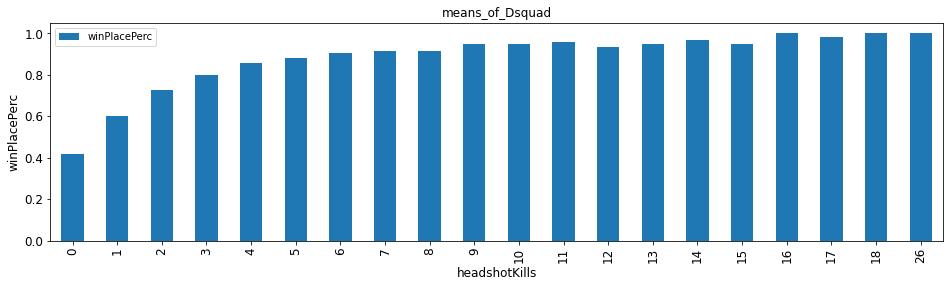

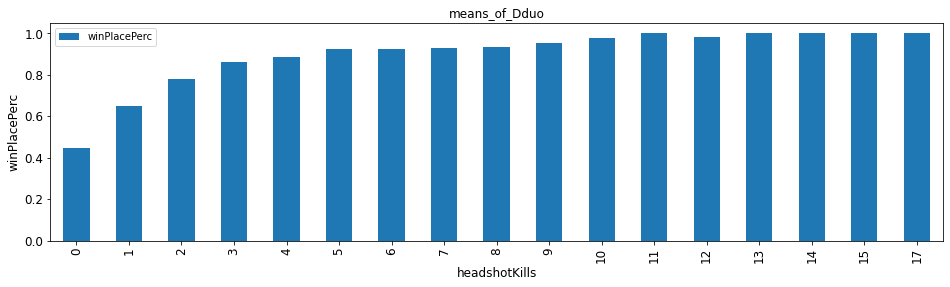

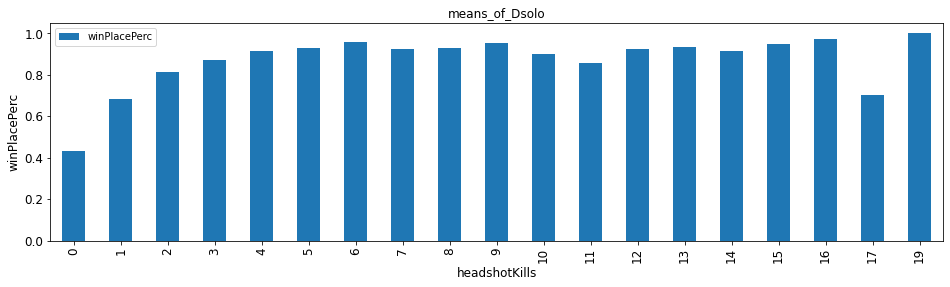

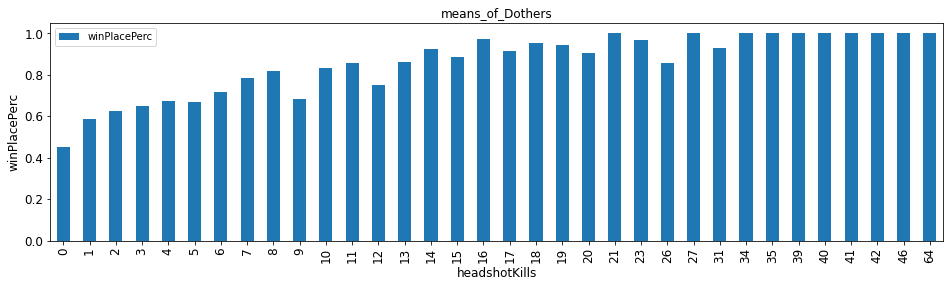

In [23]:
fig = plt.figure(figsize=(20,40))

squadfppheadshotKills = Dsquadfpp.groupby('headshotKills').mean()[['winPlacePerc']]
ax1 = squadfppheadshotKills.plot(kind='bar', title='means_of_Dsquadfpp', figsize=(16, 4), legend=True, fontsize=12)
ax1.set_xlabel('headshotKills', fontsize=12)
ax1.set_ylabel('winPlacePerc', fontsize=12)

duofppheadshotKills = Dduofpp.groupby('headshotKills').mean()[['winPlacePerc']]
ax2 = duofppheadshotKills.plot(kind='bar', title='means_of_Dduofpp', figsize=(16, 4), legend=True, fontsize=12)
ax2.set_xlabel('headshotKills', fontsize=12)
ax2.set_ylabel('winPlacePerc', fontsize=12)

solofppheadshotKills = Dsolofpp.groupby('headshotKills').mean()[['winPlacePerc']]
ax3 = solofppheadshotKills.plot(kind='bar', title='means_of_Dsolofpp', figsize=(16, 4), legend=True, fontsize=12)
ax3.set_xlabel('headshotKills', fontsize=12)
ax3.set_ylabel('winPlacePerc', fontsize=12)

squadheadshotKills = Dsquad.groupby('headshotKills').mean()[['winPlacePerc']]
ax4 = squadheadshotKills.plot(kind='bar', title='means_of_Dsquad', figsize=(16, 4), legend=True, fontsize=12)
ax4.set_xlabel('headshotKills', fontsize=12)
ax4.set_ylabel('winPlacePerc', fontsize=12)

duoheadshotKills = Dduo.groupby('headshotKills').mean()[['winPlacePerc']]
ax5 = duoheadshotKills.plot(kind='bar', title='means_of_Dduo', figsize=(16, 4), legend=True, fontsize=12)
ax5.set_xlabel('headshotKills', fontsize=12)
ax5.set_ylabel('winPlacePerc', fontsize=12)

soloheadshotKills = Dsolo.groupby('headshotKills').mean()[['winPlacePerc']]
ax6 = soloheadshotKills.plot(kind='bar', title='means_of_Dsolo', figsize=(16, 4), legend=True, fontsize=12)
ax6.set_xlabel('headshotKills', fontsize=12)
ax6.set_ylabel('winPlacePerc', fontsize=12)

othersheadshotKills = Dothers.groupby('headshotKills').mean()[['winPlacePerc']]
ax7 = othersheadshotKills.plot(kind='bar', title='means_of_Dothers', figsize=(16, 4), legend=True, fontsize=12)
ax7.set_xlabel('headshotKills', fontsize=12)
ax7.set_ylabel('winPlacePerc', fontsize=12)

plt.show()

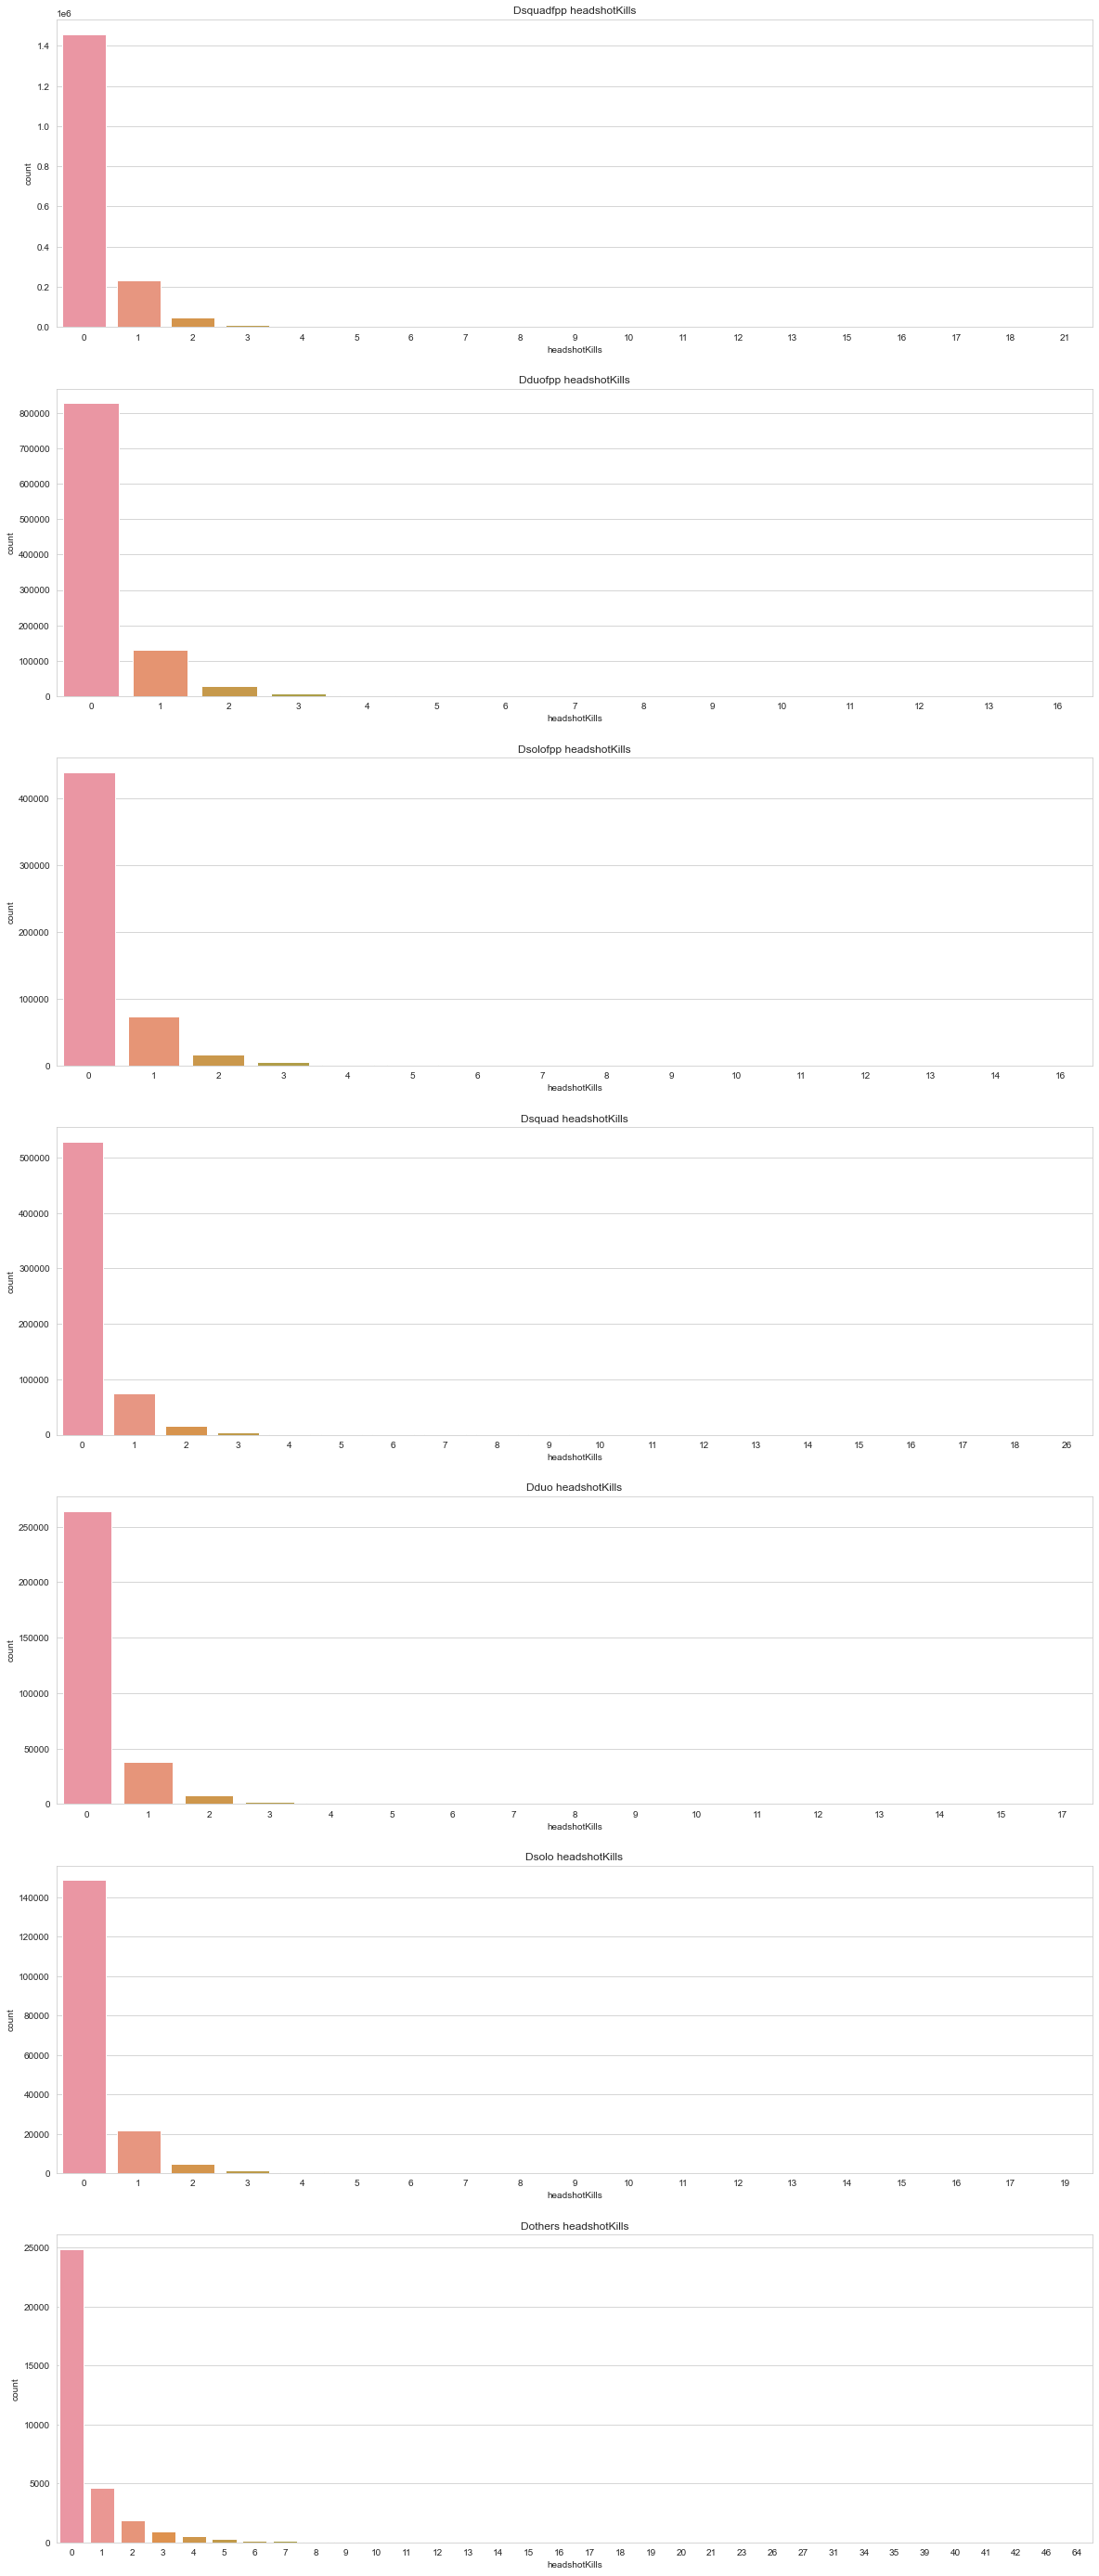

In [37]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(20,50))

ax01 = fig.add_subplot(7,1,1)
ax01.set_title('Dsquadfpp headshotKills')
sns.countplot(x='headshotKills', data=Dsquadfpp, ax=ax01)
ax02 = fig.add_subplot(7,1,2)
ax02.set_title('Dduofpp headshotKills')
sns.countplot(x='headshotKills', data=Dduofpp, ax=ax02)
ax03 = fig.add_subplot(7,1,3)
ax03.set_title('Dsolofpp headshotKills')
sns.countplot(x='headshotKills', data=Dsolofpp, ax=ax03)
ax04 = fig.add_subplot(7,1,4)
ax04.set_title('Dsquad headshotKills')
sns.countplot(x='headshotKills', data=Dsquad, ax=ax04)
ax05 = fig.add_subplot(7,1,5)
ax05.set_title('Dduo headshotKills')
sns.countplot(x='headshotKills', data=Dduo, ax=ax05)
ax06 = fig.add_subplot(7,1,6)
ax06.set_title('Dsolo headshotKills')
sns.countplot(x='headshotKills', data=Dsolo, ax=ax06)
ax07 = fig.add_subplot(7,1,7)
ax07.set_title('Dothers headshotKills')
sns.countplot(x='headshotKills', data=Dothers, ax=ax07)

plt.show()